<a href="https://colab.research.google.com/github/Kushashu-1/DeepLearning_Project/blob/main/Company_Production_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Topic : Time Series Analysis 
### Subtopic : Company Production Forecasting
### Name : Ashutosh Singh Kushwaha

In [ ]:
## Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
## Description 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [ ]:
### DATA HEAD
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

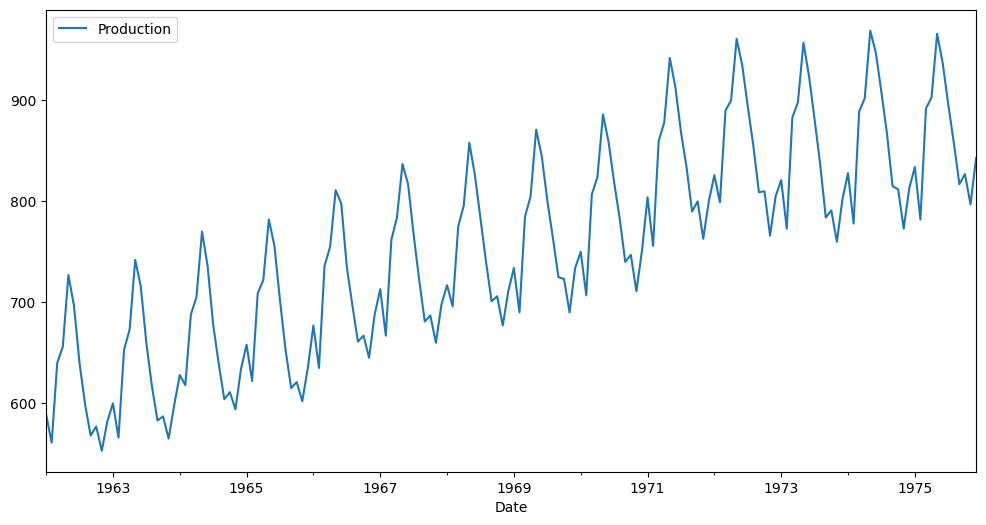

In [ ]:
df.plot(figsize = (12,6))

With the Help of Statmodels Module we are trying to analyse the Trend , Seasonality , Residual nature of Data Set

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

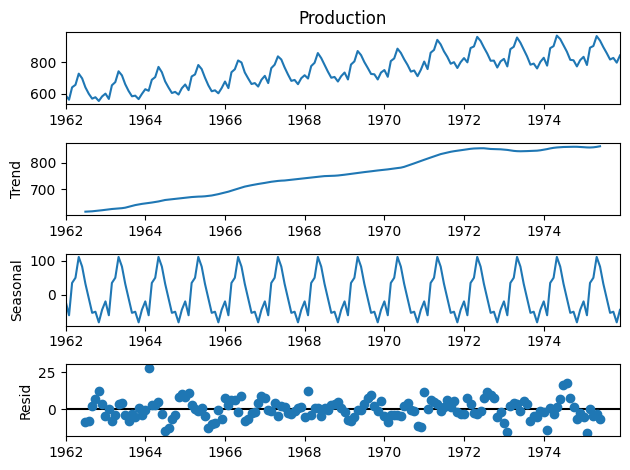

In [ ]:

results = seasonal_decompose(df['Production'])
results.plot();
# for x in range(len(df['Date'])):
#   df['Date'][x]= df['Date'][x].replace('-','')
# df['Date'] = df['Date'].astype(float)
# #df['Date'] = df['Date'].replace('-','').astype(float)
# print(df)
# #results = seasonal_decompose(df['Production'])
# #results.plot();

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:

X.shape

(1, 3, 1)

In [ ]:
# 
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.0385
Epoch 2/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0220
Epoch 3/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0225
Epoch 4/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0133
Epoch 5/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0134
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0075
Epoch 7/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0142
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 12/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 13/50
144/144 [====

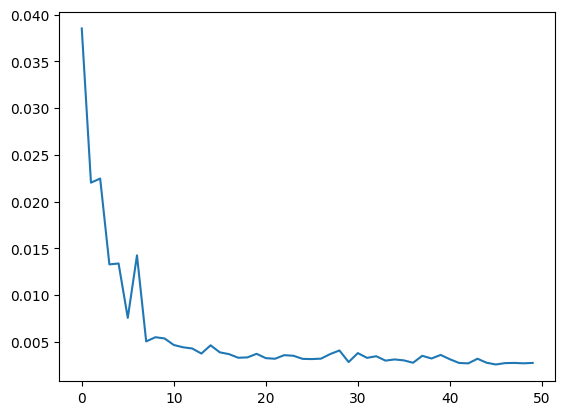

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 240ms/step


array([[0.6068099]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
test_predictions

[array([0.6068099], dtype=float32),
 array([0.61436784], dtype=float32),
 array([0.7840695], dtype=float32),
 array([0.8695489], dtype=float32),
 array([0.9499385], dtype=float32),
 array([0.9338838], dtype=float32),
 array([0.8693557], dtype=float32),
 array([0.7605814], dtype=float32),
 array([0.6580079], dtype=float32),
 array([0.60648036], dtype=float32),
 array([0.56464237], dtype=float32),
 array([0.5836743], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


<ipython-input-30-294651e76570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

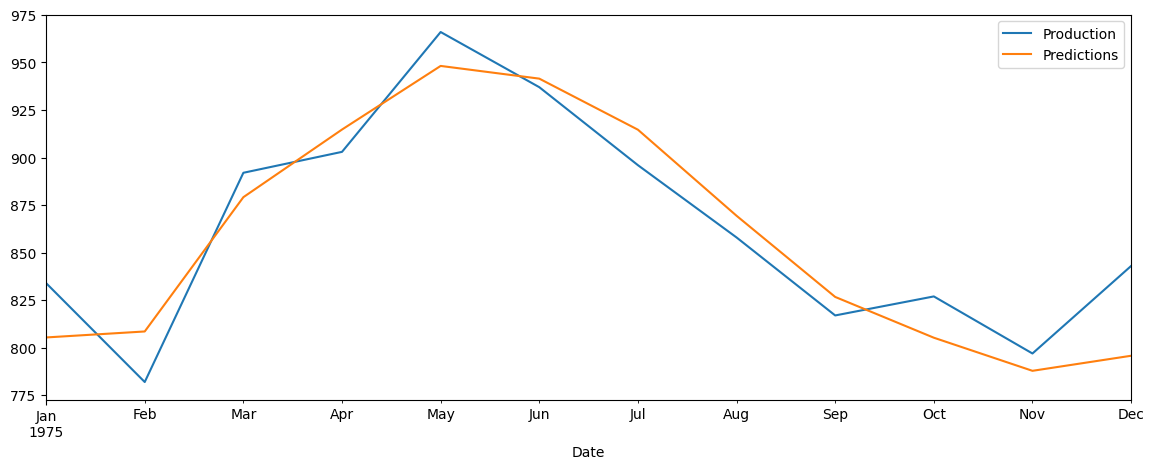

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
     

test['Predictions'] = true_predictions
     

test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
r2 =(r2_score(test['Production'],test['Predictions']))
print("R2 Score ",r2)
print("Root Mean Square error ",rmse)

R2 Score  0.8433273739569866
Root Mean Square error  21.440293581128536
